# Price elasticity

\begin{aligned}
 E  & =  \%\mathit{\Delta} Q / \%\mathit{\Delta} P \\
 & = \mathit{\Delta}Q \div Q / \mathit{\Delta}P \div P \\
  & =\dfrac{\mathit{\Delta}Q} {\mathit{\Delta}P} * \dfrac{P}  {Q}  \\
 
\end{aligned}

## Data

<Axes: xlabel='Quantity', ylabel='Price'>

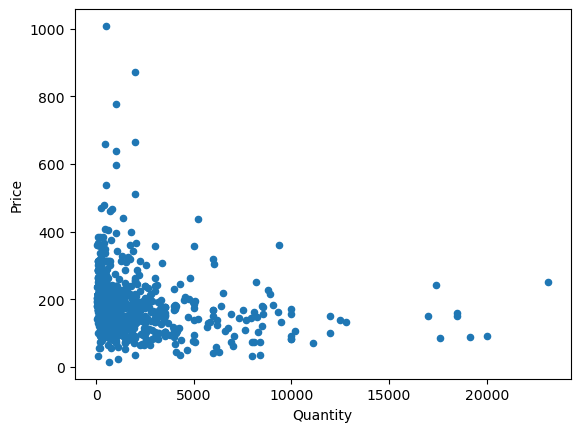

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./Data/price_data.csv')
df.head(5)
df.plot(x="Quantity", y="Price",kind="scatter")

In [57]:
df.describe()

,Price,Quantity
count,1000.000000,1000.000000
mean,192.404000,1611.900000
std,84.275947,2534.252992
min,15.000000,60.000000
25%,145.000000,300.000000
50%,187.000000,700.000000
75%,216.000000,1907.500000
max,1008.000000,23150.000000


# Modelling: Linear Price Elasticity



\begin{aligned}
Linear\ Demand\ Function\ Q  & = a + b * P \\
Linear\ Elasticity\ E  & =  \%\mathit{\Delta} Q / \%\mathit{\Delta} P \\
 & = \mathit{\Delta}Q \div Q / \mathit{\Delta}P \div P \\
 & = \dfrac{\mathit{\Delta}Q} {\mathit{\Delta}P} * \dfrac{P}  {Q} (use\ the\ mean\ as\ the\ initial\ price) \\
\end{aligned}





\begin{gather*}


\end{gather*}

In [41]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
import numpy as np

x_value = df['Price']
y_value = df['Quantity']
X = add_constant(x_value)
model = sm.OLS(y_value, X)
result = model.fit()
    
print(result.summary())

rsquared = result.rsquared
coefficient_pvalue = result.f_pvalue
intercept,slope = result.params
median_price = np.median(df['Price'])
median_quantity = np.median(df['Quantity'])
tintercept, t_score = result.tvalues
count = x_value.count()

#Linear Price elasticity Formula
price_elasticity = round((slope)*(median_price/median_quantity),2)


                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     51.14
Date:                Tue, 02 May 2023   Prob (F-statistic):           1.66e-12
Time:                        18:10:50   Log-Likelihood:                -9231.1
No. Observations:                1000   AIC:                         1.847e+04
Df Residuals:                     998   BIC:                         1.848e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2889.2504    194.994     14.817      0.0

In [42]:
print('Linear Price Elasticity {} with pvalue {}'.format(price_elasticity, coefficient_pvalue))

Linear Price Elasticity -1.77 with pvalue 1.6641207951448687e-12


# Modelling: Non-linear Price Elasticity

\begin{aligned}
Non-Linear\ Demand\ Function\ Q  & = \dfrac{a} {P^ {b}}  \\Q  & = a *  P^ {-b} \\
 log(Q) & =  log(a) - b *log(P)\\
 \dfrac{1}{Q} *\mathit{\Delta}Q& =  \dfrac{-b} {P}* \mathit{\Delta}P\ (take\ total\ differential)\ \\
Non-Linear Elasticity\ E  & =  \dfrac{\mathit{\Delta}Q}  {\mathit{\Delta} P }* \dfrac{P} {Q} = -b \\

\end{aligned}


In [43]:
import numpy as np

x_value = np.log(df['Price'])
y_value = np.log(df['Quantity'])
X = add_constant(x_value)
model = sm.OLS(y_value, X)
result = model.fit()
    
    
print(result.summary())

rsquared = result.rsquared
coefficient_pvalue = result.f_pvalue
intercept,slope = result.params
median_price = np.median(df['Price'])
median_quantity = np.median(df['Quantity'])
tintercept, t_score = result.tvalues
count = x_value.count()

#Non_linear Price elasticity Formula
non_linear_price_elasticity = round((slope),2)


                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     152.6
Date:                Tue, 02 May 2023   Prob (F-statistic):           1.01e-32
Time:                        18:10:50   Log-Likelihood:                -1562.7
No. Observations:                1000   AIC:                             3129.
Df Residuals:                     998   BIC:                             3139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1370      0.449     27.027      0.0

In [44]:
print('Non_linear Price Elasticity  {} with pvalue {}'.format(non_linear_price_elasticity, coefficient_pvalue))

Non_linear Price Elasticity  -1.07 with pvalue 1.0083563155906331e-32


In [45]:
import math

round(math.exp(12.1370),0)

186652.0

In [53]:
import numpy as np

# Set price elasticity range
elasticity = -1.07

# Set price range
price = list(np.linspace(15, 1000, num=100))
demand = 186652 * np.power(price,elasticity)
revenue = price  * demand
max_revenue = np.max(revenue)
max_index = np.argmax(revenue)
price[max_index]

15.0

<Axes: xlabel='Quantity'>

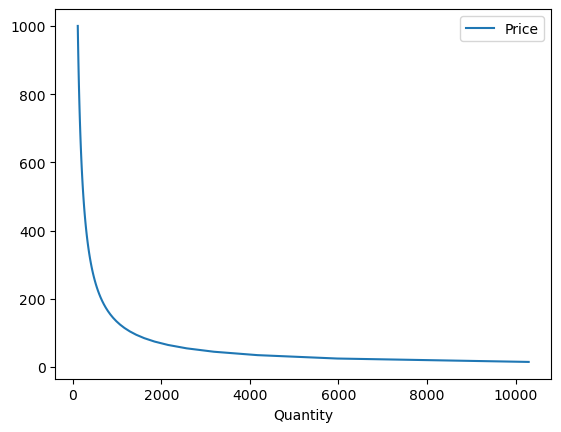

In [54]:
data = {'Price': price, 'Revenue': revenue, 'Quantity': demand}


price_df = pd.DataFrame(data)
price_df.plot(kind='line', y='Price', x="Quantity")

(0.0, 170000.0)

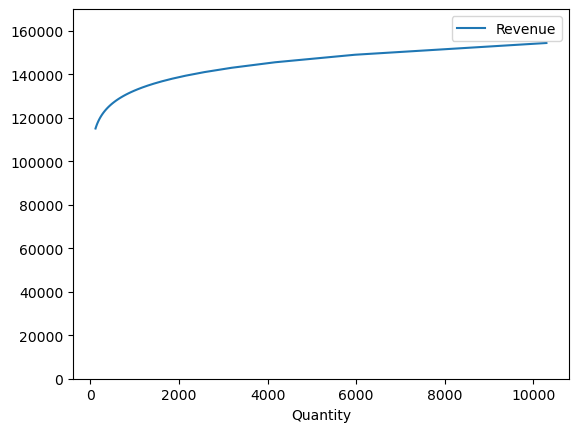

In [55]:
price_df.plot(kind='line', y='Revenue', x="Quantity")
plt.ylim(0,170000)

(0.0, 170000.0)

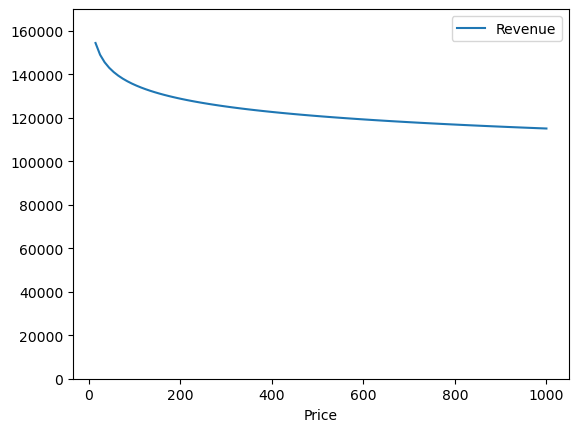

In [56]:
price_df.plot(kind='line', y='Revenue', x="Price")
plt.ylim(0,170000)